In [930]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Загружаем данные

In [931]:
item = 'credit_data' # Выбрать из поля Item для вашего датасета
package = 'modeldata' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,good,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,good,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,bad,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,good,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,good,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


### Далее идет ваше решение

Задание

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

2) Сформулируйте на базе переменных три вида гипотез:
    а) Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи
    б) Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
    в) Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
    
3) Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

4) Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения, постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи

5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ.

6) Протестируйте распределение числовой переменной на соответствие нормальному. Постройте QQ-plot и гистограмму.

7) Проведите тесты гипотез из пункта (2) и сделайте выводы. Какой практический смысл имеют результаты проведенных тестов? Как их можно использовать?

8) Результат сохранить на GitHub и отправить в виде ссылки на файл + блокнота в формате ipynb

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннуму пользователю!

## Первая гипотеза. Семейное положение (Marital) влияет на кредитный статус (Status). 

In [ ]:
df.Status.unique()

Всего есть два кредитных статуса: "Хороший" и "Плохой"

In [ ]:
df.Marital.unique()

Столбец семейное положение состоит из таких элементов, как: женаты/замужем, вдова/вдовец, холост, живут отдельно, разведены, и nan. NaN означает, наличие пропуска.

In [ ]:
df.isnull().sum()

Для данной гипотезы нужны столбцы Статус и Семейное положение. Семейное положение имеет один пропуск, думаю эту строчку можно спокойно удалить, она не должна повлиять на датасет. 

In [ ]:
df = df[df['Marital'].notna()]

In [ ]:
df.isnull().sum()

Для удобства переименую содержимое столбцов Статус и Семейное положение.

In [ ]:
df = df.replace({'good': 'Хороший', 'bad': 'Плохой', 'married': 'Женат', 'widow': 'Вдовец', 'single': 'Холост', 
            'separated': 'Живут отдельно', 'divorced': 'Разведены'})

Как видно на графике ниже, в большинстве случаев, заёмщик имеет хорошую репутацию. 

In [ ]:
sns.histplot(data=df, x="Status", color="skyblue")
plt.title("Box Plot распределения")
plt.xlabel("Значения")
plt.show()

Теперь необходимо посмотреть на распределение столбца Marital. На графике ниже, видно, что из 4209 заёмщиков, 3000 имеют статус женаты/замужем. Распределение явно не нормальное. 

In [ ]:
sns.histplot(data=df, x="Marital", color="skyblue")
plt.title("Box Plot распределения")
plt.xlabel("Значения")
plt.show()

Далее была составлена кросс таблица для столбцов Status и Marital

In [ ]:
df_task1 = pd.crosstab(df['Status'], df['Marital']) 

In [ ]:
df_task1

In [ ]:
from scipy.stats import chi2_contingency

Для проверки гипотезы 2 категориальных переменных можно воспользоваться Тестом Пирсона. 

In [ ]:
chi2, p, dof, expected = chi2_contingency(df_task1)

У этого теста нулевая гипотеза говорит, что между кредитным статусом и семейным положением зависимости нет.
p-значение существенно ниже 5%, следовательно, данные противоречат нулевой гипотезе и можно её отвергнуть.
Между кредитным статусом и семейным положение есть зависимость. 

In [ ]:
print(f" p-значение: {p}")

Обоснование гипотезы: Так как переменные имеют значимую зависимость, перед выдачей кредита необходимо смотреть текущий семейный статус. Наиболее стабильные и менее рискованные группы это замужние/женатые и вдовцы

## Вторая гипотеза: Сумма активов (Assets), кто имеет фиксированное время работы (fixed в столбце Job), больше, чем у остальных.

Первым делом, проверю из чего состоит столбец Job.

In [ ]:
df.Job.unique()

In [ ]:
df = df.replace({'freelance': 'Фриланс', 'fixed': 'Фикс. время работы', 'partime': 'Неполная занятость', 'others': 'Другое'})

В данном столбец имеются 2 пропуска, думаю их можно спокойно удалить

In [ ]:
df.Job.isna().sum()

In [ ]:
df = df[df['Job'].notna()]

In [ ]:
df.Job.isna().sum()

По распределению столбца Job, видно, что наиболее сильно выделяется заёмщики, у которых фиксированное время работы, более 2500 человек. Сумма же оставшихся 3 категорий, меньше 2000. Данный столбец не имеет нормального распределения. 

In [ ]:
sns.histplot(data=df, x="Job", color="skyblue")
plt.title("Box Plot Job распределения")
plt.xlabel("Значения")
plt.show()

В столбце Assets, имеется 46 пропуска. Так просто их нельзя удалить и необходимо решить, как их заполнять. 

In [ ]:
df.Assets.isna().sum()

Распределение пропусков в столбце Assets по категориям из столбца Job

In [ ]:
missing_data = df.groupby('Job')['Assets'].apply(lambda x: x.isnull().sum())

In [ ]:
missing_data

In [ ]:
missing_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Количество пропусков в столбце 'Assets' по категориям")
plt.xlabel("Категории")
plt.ylabel("Количество пропусков")
plt.show()

Хоть на графике ниже, отчетливо видно, что данные распределены не нормально, необходимо убедиться в этом. 


In [ ]:
plt.hist(df['Assets'], bins=30, color="skyblue", edgecolor="black")
plt.title("Гистограмма распределения Assets")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

In [ ]:
from scipy.stats import shapiro

Немного странное число получилось, я ему не доверяю, возможно данный результат получился из -за того, что в столбце есть выбросы.

In [ ]:
stat, p_value = shapiro(df['Assets'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

### Если удалить все пропуски в столбце

In [ ]:
stat, p_value = shapiro(df[df['Assets'].notna()]['Assets'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

### Если заполнить все пропуски средним значением

In [ ]:
na_index = df[df['Assets'].isna()].index

In [ ]:
mean_price = df['Assets'].mean()
df['assets_filled_mean'] = df['Assets'].fillna(mean_price)

In [ ]:
stat, p_value = shapiro(df['assets_filled_mean'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

### Если заполнить все пропуски медианным значением

In [ ]:
median_price = df['Assets'].median()
df['assets_filled_median'] = df['Assets'].fillna(median_price)


In [ ]:
stat, p_value = shapiro(df['assets_filled_median'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

### Если заполнить все пропуски рандомным значением

In [ ]:
size_na = df['Assets'].isna().sum()
random = df['Assets'].dropna().sample(size_na).values
df['assets_filled_random'] = df['Assets']
df.loc[df['assets_filled_random'].isna(), 'assets_filled_random'] = random

In [ ]:
stat, p_value = shapiro(df['assets_filled_random'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

### Как видно, заполняя пропуски различными способами, распределение всё равно не стало нормальным. Также было принято решение, удалить все пропуски. 

In [ ]:
df = df[df['Assets'].notna()]

In [ ]:
df.Assets.isna().sum()

In [ ]:
import seaborn as sns

### На графике ниже видно, что в столбец Assets имеется больше количество выбросов.

In [ ]:
sns.boxplot(data=df, x="Assets", color="skyblue")
plt.title("Box Plot распределения")
plt.xlabel("Значения")
plt.show()

In [ ]:
from scipy.stats import probplot

### QQ Plot показывает тоже самое

In [ ]:
plt.figure(figsize=(8, 6))
probplot(df['Assets'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.xlabel("Теоретические квартили")
plt.ylabel("Наблюдаемые значения")
plt.show()

Общее количество выбросов в столбце Assets = 277, это большое число и просто так их удалить нельзя, так как может потеряться ценная информация. Для этого можно воспользоваться 25% квантилем и 75% квантилем, чтобы определить подходящую границу данных, которые можно использовать.

In [ ]:
Q1 = df['Assets'].quantile(0.25)
Q3 = df['Assets'].quantile(0.75)
IQR = Q3 - Q1
# Определяем границы для выбросов среди всего столбца
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Assets'] < lower_bound) | (df['Assets'] > upper_bound)]
print(f"Общее количество выбросов в столбце Assets: {len(outliers)}")

In [ ]:
df_fixed = df[df['Job'] == 'Фикс. время работы']
Q1 = df_fixed['Assets'].quantile(0.25)
Q3 = df_fixed['Assets'].quantile(0.75)
IQR = Q3 - Q1
# Определяем границы для выбросов в столбце Assets, в категории 'Фикс. время работы'
lower_bound_fixed = Q1 - 1.5 * IQR
upper_bound_fixed = Q3 + 1.5 * IQR
outliers = df_fixed[(df_fixed['Assets'] < lower_bound_fixed) | (df_fixed['Assets'] > upper_bound_fixed)]
print(f"Количество выбросов в столбце Assets в категории 'Фикс. время работы': {len(outliers)}")

In [ ]:
df_other = df[df['Job'] != 'Фикс. время работы']
Q1 = df_other['Assets'].quantile(0.25)
Q3 = df_other['Assets'].quantile(0.75)
IQR = Q3 - Q1
# Определяем границы для выбросов в столбце Assets, во всех остальных категориях кроме 'Фикс. время работы'
lower_bound_other = Q1 - 1.5 * IQR
upper_bound_other = Q3 + 1.5 * IQR
outliers = df_other[(df_other['Assets'] < lower_bound_other) | (df_other['Assets'] > upper_bound_other)]
print(f"Количество выбросов в столбце Assets во всех остальных категориях кроме 'Фикс. время работы' {len(outliers)}")

### Объединенный датасет без выбросов в столбце Assets. 

In [ ]:
df_clear = df[(((df['Job'] == 'Фикс. время работы') &(df['Assets'] > lower_bound_fixed) & (df['Assets'] < upper_bound_fixed))
               | ((df['Job'] != 'Фикс. время работы') & (df['Assets'] > lower_bound_other) & (df['Assets'] < upper_bound_other)))]

### Разбиваем общий датасет, с выбросами, на 2, что бы проанализировать гипотезу

In [ ]:
df_assets_fixed = df.loc[df['Job']=='Фикс. время работы', 'Assets']
df_assets_others = df.loc[df['Job']!='Фикс. время работы', 'Assets']

### Средняя сумма активов у всех, кроме заёмщиков с фикс. временем работы =  7935

In [ ]:
df_assets_others.mean()

### Средняя сумма активов у заёмщиков с фикс. временем работы =  3933

In [ ]:
df_assets_fixed.mean()

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
mannwhitneyu(df_assets_others, df_assets_fixed, alternative = 'two-sided') 

Нулевая гипотеза: Сумма активов (Assets), кто имеет фиксированное время работы (fixed в столбце Job), не больше, чем у остальных.
Полученное p-значение говорит нам о том, что нулевое гипотезу можно смело отвергнуть, так как полученное число < 5%.
Следовательно, существует статистически значимая разница в сумме активов между группами. Однако, средняя сумма активов у заёмщиков с фиксированным временем работы, меньше, чем у остальных. Можно сделать вывод, что гипотеза не подтверждается - люди с фиксированным временем работы имеют меньше активов, чем другие категории.

Теперь необходимо проверить нулевые и основную гипотезу для данных без выбросов. 

In [ ]:
df_assets_others = df_clear.loc[df_clear['Job']!='Фикс. время работы', 'Assets']
df_assets_fixed = df_clear.loc[df_clear['Job']=='Фикс. время работы', 'Assets']

### Средняя сумма активов у всех, кроме заёмщиков с фикс. временем работы =  4568

In [ ]:
df_assets_others.mean()

### Средняя сумма активов у заёмщиков с фикс. временем работы =  2942

In [ ]:
df_assets_fixed.mean()

In [ ]:
mannwhitneyu(df_assets_others, df_assets_fixed, alternative = 'two-sided')

Получаем точно такой же результат, только уже для очищенных данных. Можно сделать вывод, что гипотеза не подтверждается - люди с фиксированным временем работы имеют меньше активов, чем другие категории.

Для большей убедительности, можно провести t-тест. 
Данный тест, также показал, что есть значимые различия между двумя группами, также очень низкое p-значение, что может свидетельствовать, о том, что нулевую гипотезу можно отвергнуть.

In [897]:
t_stat, p_value = ttest_ind(df_assets_others, df_assets_fixed)

print("t-статистика:", t_stat)
print("p-значение:", p_value)

t-статистика: 12.719604987877284
p-значение: 2.1909672210391043e-36


### Практический смысл: Можно подготовить подходящие кредитные программы для покупки имущественных активов, для заёмщиков с фикс. временем работы. Так как первые имеют намного меньше активов, чем вторые, то удобные и щадящие кредиты помогут привлечь новых клиентов. То есть сделать акцент именно на группу заёмщиков с фикс. временем работы. 

# 3 гипотеза: Человек с большими доходами (Income) будет просить сумму кредита (Amount) больше, чем человек с низкими доходами

Столбец с доходами (Income) имеется большое количество пропусков.  

In [898]:
df.Income.isna().sum()

366


Пропуски явно влияют на расчет числа p.


In [899]:
stat, p_value = shapiro(df['Income'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

Тест Шапиро-Уилка p-value: 1.0
Распределение похоже на нормальное.


Потому что, если их заполнить, то p-значение сразу станет ненормальным.

In [900]:
df['Income'].fillna(df['Income'].median(), inplace=True)

In [901]:
stat, p_value = shapiro(df['Income'])
print(f"Тест Шапиро-Уилка p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

Тест Шапиро-Уилка p-value: 7.170848453165128e-59
Распределение не является нормальным.


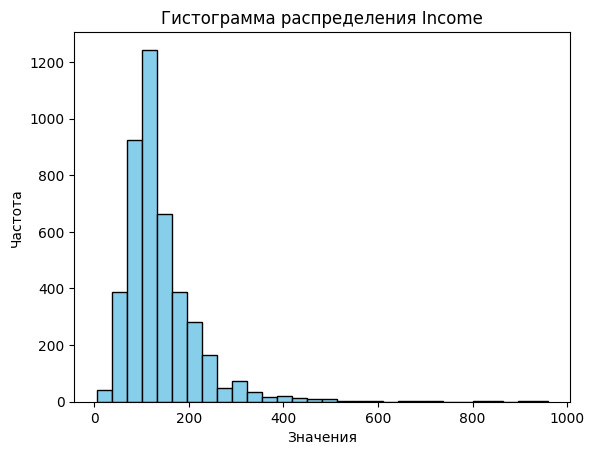

In [928]:
plt.hist(df['Income'], bins=30, color="skyblue", edgecolor="black")
plt.title("Гистограмма распределения Income")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

In [903]:
df.Income.isna().sum()

0

Поле сумма кредита (Amount), не имеет пропусков 

In [904]:
df.Amount.isna().sum()

0

Распределение в столбце Amount, также ненормальное

In [905]:
stat, p_value = shapiro(df['Amount'])
print(f"Shapiro-Wilk p-value: {p_value}")

if p_value > 0.05:
    print("Распределение похоже на нормальное.")
else:
    print("Распределение не является нормальным.")

Shapiro-Wilk p-value: 4.41962035616294e-36
Распределение не является нормальным.


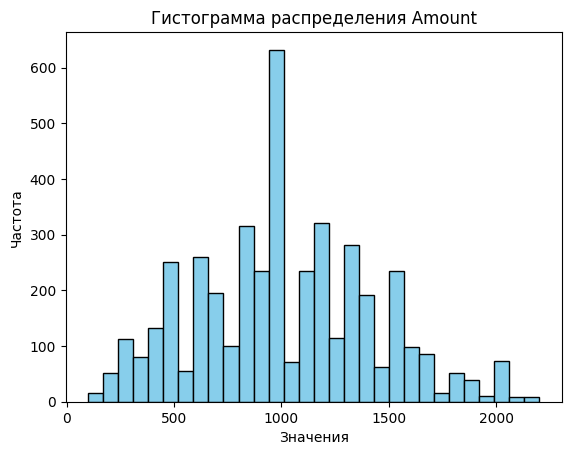

In [929]:
plt.hist(df['Amount'], bins=30, color="skyblue", edgecolor="black")
plt.title("Гистограмма распределения Amount")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.show()

Далее необходимо проверить столбцы на наличие выбросов. 


На двух нижних графиках видно, что в столбце Income имеются выбросы. 

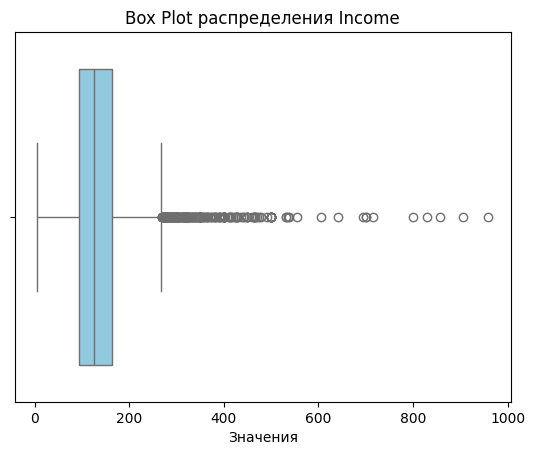

In [907]:
sns.boxplot(data=df, x="Income", color="skyblue")
plt.title("Box Plot распределения Income")
plt.xlabel("Значения")
plt.show()

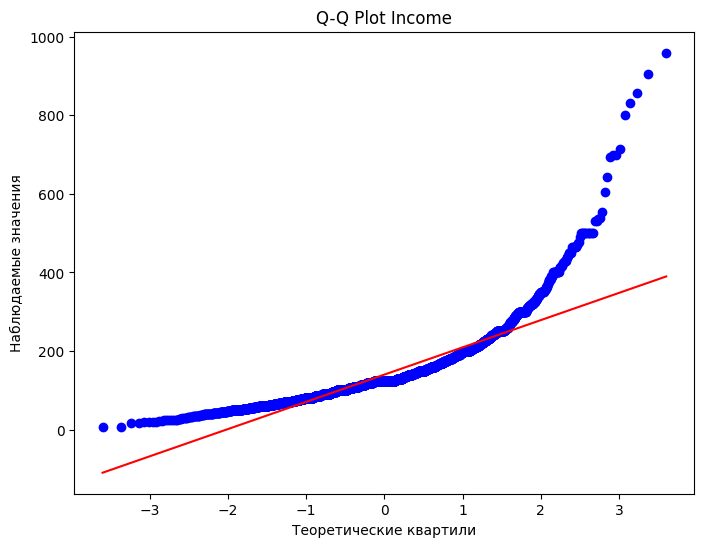

In [908]:
plt.figure(figsize=(8, 6))
probplot(df['Income'], plot=plt)
plt.title("Q-Q Plot Income")
plt.xlabel("Теоретические квартили")
plt.ylabel("Наблюдаемые значения")
plt.show()

Точно также, в столбце Amount имеются выбросы

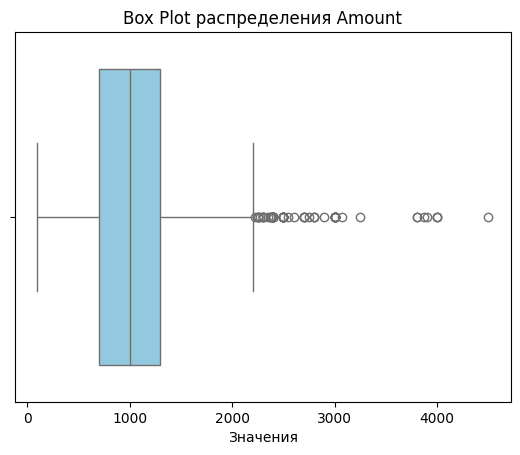

In [909]:
sns.boxplot(data=df, x="Amount", color="skyblue")
plt.title("Box Plot распределения Amount")
plt.xlabel("Значения")
plt.show()

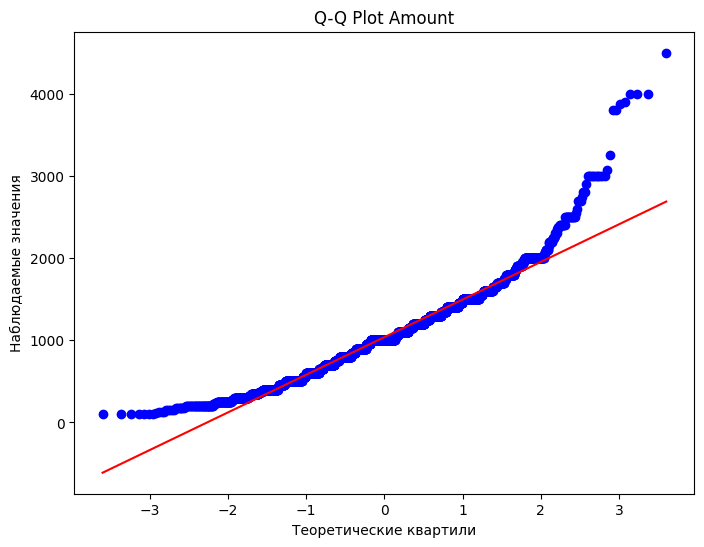

In [910]:
plt.figure(figsize=(8, 6))
probplot(df['Amount'], plot=plt)
plt.title("Q-Q Plot Amount")
plt.xlabel("Теоретические квартили")
plt.ylabel("Наблюдаемые значения")
plt.show()

Далее эти выбросы были определены и удалены из выборки

In [911]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Income'] < lower_bound) | (df['Income'] > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")

Количество выбросов: 242


In [912]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
# Определяем границы для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Количество выбросов: {len(outliers)}")

Количество выбросов: 70


In [913]:
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

In [914]:
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

In [915]:
from scipy.stats import ttest_ind

Средняя сумма кредитов у тех, кто имеет доход > 250 = 1114

In [916]:
df[df['Income'] >= 250]['Amount'].mean()

1153.990506329114

Средняя сумма кредитов у тех, кто имеет доход < 250 = 999

In [917]:
df[df['Income'] < 250]['Amount'].mean()

999.2761881064941

Затем была найдена корреляция между столбцами, при помощи методов Спирмена и Кендалла. Методы показали слабую корреляцию между доходом и суммой кредита

In [918]:
correlation_spearman = df['Income'].corr(df['Amount'], method='spearman')
print("Коэффициент корреляции Спирмена:", correlation_spearman)

Коэффициент корреляции Спирмена: 0.16654067137859616


In [919]:
correlation_kendall = df['Income'].corr(df['Amount'], method='kendall')
print("Коэффициент корреляции Кендалла:", correlation_kendall)

Коэффициент корреляции Кендалла: 0.11509504821743041


На графике рассеивания, так можно высмотреть слабую линейную зависимость. 

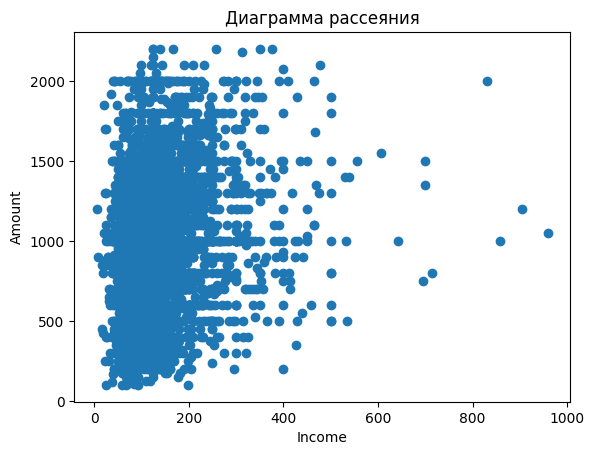

In [920]:
plt.scatter(df['Income'], df['Amount'])
plt.xlabel('Income')
plt.ylabel('Amount')
plt.title('Диаграмма рассеяния')
plt.show()

Тесты также показали, что средняя сумма кредита у заёмщиков с высокими доходами, действительно отличается, от суммы кредита у заёмщиков с низкими доходами. Так как p-значение меньше чем 0.05

In [922]:
t_stat, p_value = ttest_ind(df[df['Income'] >= 150]['Amount'], df[df['Income'] < 150]['Amount'])

print("t-статистика:", t_stat)
print("p-значение:", p_value)

t-статистика: 9.441868505678762
p-значение: 5.8151379859406504e-21


In [921]:
t_stat, p_value = ttest_ind(df[df['Income'] >= 200]['Amount'], df[df['Income'] < 200]['Amount'])

print("t-статистика:", t_stat)
print("p-значение:", p_value)

t-статистика: 9.15485125668358
p-значение: 8.199202221264543e-20


In [923]:
t_stat, p_value = ttest_ind(df[df['Income'] >= 250]['Amount'], df[df['Income'] < 250]['Amount'])

print("t-статистика:", t_stat)
print("p-значение:", p_value)

t-статистика: 6.42121977507873
p-значение: 1.4972723867158401e-10


### Вывод: Гипотеза частично подтверждена, так как корреляция очень слабая между столбцами.

### Практическая значимость: Можно предложить льготные кредиты или меньший процент, чтобы привлечь новых клиентов или заинтересовать уже существующих клиентов в новом кредите. Например, те заёмщики у которых есть кредит в текущем банке, могут получить следующий кредит уже с меньшей процентной ставкой или повышенным максимальным лимитом. При условии, что у заёмщика хороший кредитный статус. 